## creation of the correlation between trigger capablity and physical channels - tab. 3

**This approach is based on the fact that every smartapp's trigger capability is correlated with a unique trigger channel**

possible problems:

1. always the trigger capability describe a physical channel? (yes)

evolution:

1. save every pair of trigger-action and every smart app description
2. save the cluster of every channel
3. extrapolate from smartapp all the trigger and action capabilities
4. find the correlation between capability and channels


In [3]:
from gensim.models import Word2Vec, KeyedVectors 
import json   # for read the JSON file
import stanza # Official Stanford NLP Python Library for Many Human Languages
import re 
import numpy as np

In [4]:
file = open("../../1_Intra_app_Analysis/trigger-action.JSON","r") # read all the capability extrapolated from the apps
trigger_action = json.load(file)
print("tot app analysed:",len(trigger_action.keys()))

tot app analysed: 86


In [5]:
file = open("../../1_Intra_app_Analysis/app-description.JSON","r") # need the desription of the analysed apps
app_description = json.load(file)

In [6]:
# as wrote in the paper "In the end, we check each cluster’s representative keyword and remove
# non-physical-channel related keywords." (cap 4.2 - p 835) so modify and use cluster_pysical_channels_FINAL
file = open("../cluster_channels_FINAL.JSON","r") 
dict_channels = json.load(file)
dict_channels

{'temperature': ['air_conditioner',
  'ambient',
  'heater',
  'temp',
  'thermostat',
  'ventilation',
  'temperature'],
 'humidity': ['moisture', 'ventilation', 'humidity'],
 'illumination': ['brightness',
  'bulbs',
  'cameras',
  'candle',
  'colors',
  'light',
  'lighting',
  'switch',
  'switches',
  'lights'],
 'motion': ['action', 'motion'],
 'location': ['area', 'hub', 'place', 'location'],
 'smoke': ['fire',
  'heater',
  'leaks',
  'temperature',
  'ventilation',
  'carbon_monoxide'],
 'leakage': ['leaks',
  'lever',
  'sensor',
  'sensors',
  'switches',
  'valve',
  'water',
  'weather',
  'sms'],
 'time': ['amount',
  'anytime',
  'day',
  'days',
  'hour',
  'minutes',
  'period',
  'times',
  'week',
  'time'],
 'locationMode': ['location', 'mode'],
 'lock': ['door', 'doors', 'lever', 'push', 'turn', 'lock']}

In [8]:
stanza.download('en')       # This downloads the English models for the neural pipeline
nlp = stanza.Pipeline('en') # This sets up a default neural pipeline in English
model = KeyedVectors.load_word2vec_format('../../../../GoogleNews-vectors-negative300.bin', binary=True, limit=100000) # load word2vec pre-trained

2021-10-12 10:43:58 INFO: Downloading default packages for language: en (English)...
2021-10-12 10:44:00 INFO: File exists: /home/volta/stanza_resources/en/default.zip.
2021-10-12 10:44:05 INFO: Finished downloading models and saved to /home/volta/stanza_resources.
2021-10-12 10:44:05 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2021-10-12 10:44:05 INFO: Use device: cpu
2021-10-12 10:44:05 INFO: Loading: tokenize
2021-10-12 10:44:05 INFO: Loading: pos
2021-10-12 10:44:05 INFO: Loading: lemma
2021-10-12 10:44:05 INFO: Loading: depparse
2021-10-12 10:44:06 INFO: Loading: sentiment
2021-10-12 10:44:06 INFO: Loading: constituency
2021-10-12 10:44:06 INFO: Loading: ner
2021-10-12 10:44:07 INFO: Done loading processors!


In [9]:
list_all_capabilities = []
for app in trigger_action.keys():         # for every app analysed
    for trigger_cap in trigger_action[app].keys():      # for every trigger channel of that app
            for action in trigger_action[app][trigger_cap]: # for every action 
                action_cap = action[0]
                if not trigger_cap in list_all_capabilities: # if not duplicate
                    list_all_capabilities.append(trigger_cap)
                if not action_cap in list_all_capabilities:
                    list_all_capabilities.append(action_cap)

list_all_capabilities.sort()
list_all_capabilities

['accelerationSensor',
 'alarm',
 'app',
 'beacon',
 'button',
 'carbonMonoxideDetector',
 'colorControl',
 'contactSensor',
 'device.PetFeederShield',
 'device.jawboneUser',
 'doorControl',
 'illuminanceMeasurement',
 'imageCapture',
 'location',
 'locationMode',
 'lock',
 'momentary',
 'motionSensor',
 'musicPlayer',
 'number',
 'powerMeter',
 'presenceSensor',
 'relativeHumidityMeasurement',
 'sendAction',
 'smokeDetector',
 'switch',
 'switchLevel',
 'temperatureMeasurement',
 'thermostat',
 'threeAxis',
 'time',
 'touchSensor',
 'valve',
 'waterSensor']

In [18]:
# function that map the capability to string
def cap2string(capability):
    switcher = {
        'accelerationSensor': "acceleration",
        'alarm': "alarm",
        'app': "app",
        'beacon': "beacon",
        'button': "button",
        'carbonMonoxideDetector': "carbon_monoxide",
        'colorControl': "color",
        'contactSensor': "contact",
        'doorControl': "door control",
        'illuminanceMeasurement':"illumination",
        'imageCapture': "image capture",
        'location':"location",
        'momentary': "momentary",
        'motionSensor':"motion ",
        'musicPlayer': "music player",
        'powerMeter':"power",
        'presenceSensor': "presence",
        'relativeHumidityMeasurement': "relative humidity ",
        'smokeDetector': "smoke",
        'switch': "switch",
        'switchLevel': "switch level",
        'temperatureMeasurement':"temperature",
        'thermostat': "thermostat",
        'threeAxis':"three axis",
        'touchSensor':"touch",
        'valve':"valve",
        'waterSensor':"water sensor",
        'device.PetFeederShield':"pet feeder shield",
        'device.jawboneUser':"jawbone user",
        'number': "number",
        
        'lock':"lock",
        'locationMode':"locationMode",
        'sendAction':"send action",
        'time':"time"
    }
    return switcher.get(capability, f"capabliti not found: {capability}")

In [19]:
list_string_capabilities = []
for cap in list_all_capabilities:
    list_string_capabilities.append(cap2string(cap))
    
list_string_capabilities

['acceleration',
 'alarm',
 'app',
 'beacon',
 'button',
 'carbon_monoxide',
 'color',
 'contact',
 'pet feeder shield',
 'jawbone user',
 'door control',
 'illumination',
 'image capture',
 'location',
 'locationMode',
 'lock',
 'momentary',
 'motion ',
 'music player',
 'number',
 'power',
 'presence',
 'relative humidity ',
 'send action',
 'smoke',
 'switch',
 'switch level',
 'temperature',
 'thermostat',
 'three axis',
 'time',
 'touch',
 'valve',
 'water sensor']

In [20]:
# now correlate every trigger/action capability to its own channel
words_pattern = '[a-zA-Z_]+'
cap_to_channel = {"temperature":[], "humidity":[], "illumination":[], "motion":[], "location":[], 
                           "smoke":[], "leakage":[], "time":[], "locationMode":[], "lock":[]}

for cap in list_string_capabilities: # analyse every cappability (a capability could have more word inside)
    keywords = [] # keywords found inside app capability
    keywords = re.findall(words_pattern, cap, flags=re.IGNORECASE) # extrapolate the words from the capability
    print(keywords)
    
    if "time" in keywords:
        cap_to_channel["time"].append("time")
        
    elif "locationMode" in keywords:
        cap_to_channel["locationMode"].append("locationMode")
        
    elif "lock" in keywords:
        cap_to_channel["lock"].append("lock")
        
    else:
        
        clean_keywords = [] # find what words can be really processed by word2vec
        for i in range(len(keywords)):                   # for every keyword exstracted
            try:
                model[keywords[i]]                       # check Word2Vec
                clean_keywords.append(keywords[i])       # if can apply word2vec save it
            except KeyError as err:
                print("handling Error: ", err)           # some words can not be processed by Word2Vec

        print(cap,"-", clean_keywords)        

        similarity_list = {} # list made by 
        if len(clean_keywords) == 0: # case there aren't any NN keyword inside that app description (strange)
            print(f"!!error!!")

        else:
            if len(clean_keywords) == 1: # case there are only 1 keyword inside capability
                for key in dict_channels.keys(): # check for every physical channel
                    similarity_temp = 0
                    for channel_NN in dict_channels[key]: # for every keyword inside the channel cluster
                        similarity_temp += model.similarity(clean_keywords[0],channel_NN)
                    # divide by the number of cluster keywords --> result: the mean of similarity
                    similarity_list[key] = (similarity_temp/len(dict_channels[key]))*100

            else: # case there are more than 1 keyword inside tcapability
                for key in dict_channels.keys(): # check for every physical channel
                    similarity_partial = 0
                    for keyword in clean_keywords: # for every keyword NN extracted from description
                        similarity_temp = 0
                        for channel_NN in dict_channels[key]:  # for every keyword inside the channel cluster
                            #print(keyword,channel_NN,"\t", model.similarity(keyword,channel_NN))
                            similarity_temp += model.similarity(keyword,channel_NN)
                         # divide by the number of cluster keywords --> result: the mean of similarity (given by only 1 NN)
                        similarity_temp = similarity_temp/len(dict_channels[key])
                        similarity_partial += similarity_temp
                    #print("this keyword for ",key,"has got a level", similarity_partial/len(clean_keywords))
                    similarity_list[key] = (similarity_partial/len(clean_keywords))*100

            print(similarity_list)
            # now find the highest physical channel association 
            channel_association = ""
            max_value = 0
            for channel in similarity_list.keys():
                if (similarity_list[channel] > max_value) and (channel != "locationMode"):
                    max_value = similarity_list[channel]
                    channel_association = channel

            print("most similar:", channel_association, max_value, "\n")
            cap_to_channel[channel_association].append(cap)

cap_to_channel

['acceleration']
acceleration - ['acceleration']
{'temperature': 12.674963900021144, 'humidity': 11.768864840269089, 'illumination': 10.116687174886465, 'motion': 20.86850181221962, 'location': 3.6133638117462397, 'smoke': 11.38808336108923, 'leakage': 16.760574653744698, 'time': 11.077272407710552, 'locationMode': 13.713191077113152, 'lock': 14.813966567938527}
most similar: motion 20.86850181221962 

['alarm']
alarm - ['alarm']
{'temperature': 23.446749576500483, 'humidity': 18.44686518112818, 'illumination': 19.116681814193726, 'motion': 6.2322866171598434, 'location': 7.0389846339821815, 'smoke': 27.085073788960774, 'leakage': 17.94242958227793, 'time': 6.096055544912815, 'locationMode': 11.390898749232292, 'lock': 16.503637532393135}
most similar: smoke 27.085073788960774 

['app']
app - ['app']
{'temperature': 8.123566103833062, 'humidity': 8.753823737303417, 'illumination': 8.183806985616684, 'motion': 3.794695623219013, 'location': 12.686728686094284, 'smoke': 4.531761584803462

{'temperature': ['thermostat'],
 'humidity': ['relative humidity ', 'temperature'],
 'illumination': ['beacon',
  'color',
  'illumination',
  'image capture',
  'momentary',
  'power',
  'switch',
  'switch level'],
 'motion': ['acceleration', 'motion ', 'send action'],
 'location': ['location', 'music player', 'presence'],
 'smoke': ['alarm', 'carbon_monoxide', 'smoke'],
 'leakage': ['app', 'jawbone user', 'valve', 'water sensor'],
 'time': ['number', 'three axis', 'time'],
 'locationMode': ['locationMode'],
 'lock': ['button',
  'contact',
  'pet feeder shield',
  'door control',
  'lock',
  'touch']}

In [21]:
cap_to_channel

{'temperature': ['thermostat'],
 'humidity': ['relative humidity ', 'temperature'],
 'illumination': ['beacon',
  'color',
  'illumination',
  'image capture',
  'momentary',
  'power',
  'switch',
  'switch level'],
 'motion': ['acceleration', 'motion ', 'send action'],
 'location': ['location', 'music player', 'presence'],
 'smoke': ['alarm', 'carbon_monoxide', 'smoke'],
 'leakage': ['app', 'jawbone user', 'valve', 'water sensor'],
 'time': ['number', 'three axis', 'time'],
 'locationMode': ['locationMode'],
 'lock': ['button',
  'contact',
  'pet feeder shield',
  'door control',
  'lock',
  'touch']}

In [22]:
with open("set_of_capability_related_channels.JSON","w") as outfile:
    json.dump(cap_to_channel, outfile)

## analysis of the number of trigger-capability and action-capability

In [23]:
dict_actions_related={"temperature":[], "humidity":[], "illumination":[], "location":[],
                          "motion":[], "smoke":[], "leakage":[], "time":[], "locationMode":[], "lock":[]}

dict_trigger_related={"temperature":[], "humidity":[], "illumination":[], "location":[],
                          "motion":[], "smoke":[], "leakage":[], "time":[], "locationMode":[], "lock":[]}
                
for app in trigger_action.keys(): # for every app where I can extrapolate info
    for trigger_cap in trigger_action[app].keys(): # for every app trigger capability
        # now I search all action capabilities
        for actions in trigger_action[app][trigger_cap]: # for every action correlated to that trigger capability
            string_action_capability = cap2string(actions[0]) # save the action capability and convert it to string
            # save the action capability
            for channel in cap_to_channel.keys(): # for every channel
                if string_action_capability in cap_to_channel[channel]: # find if there is that action capability
                    dict_actions_related[channel].append(string_action_capability) # if there is save the action capability 
        
        # save all trigger capability
        string_trigger_capability = cap2string(trigger_cap)
        for channel in cap_to_channel.keys(): # for every channel
            if string_trigger_capability in cap_to_channel[channel]: # find if there is that action capability
                    dict_trigger_related[channel].append(string_trigger_capability) # if there is save the action capability 
        
dict_trigger_related

{'temperature': ['thermostat', 'thermostat', 'thermostat'],
 'humidity': ['relative humidity ',
  'temperature',
  'temperature',
  'temperature',
  'relative humidity ',
  'temperature',
  'temperature'],
 'illumination': ['beacon',
  'switch',
  'power',
  'power',
  'switch',
  'switch',
  'illumination',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch'],
 'location': ['location',
  'location',
  'presence',
  'presence',
  'presence',
  'presence',
  'presence',
  'location',
  'location',
  'presence',
  'location',
  'presence',
  'presence',
  'presence',
  'presence',
  'presence',
  'presence',
  'location',
  'presence',
  'presence',
  'presence',
  'presence'],
 'motion': ['motion ',
  'motion ',
  'motion ',
  'motion ',
  'motion ',
  'motion ',
  'acceleration',
  'acceleration',
  'motion ',
  'acceleration',
  'acceleration',
  'motion ',
  'acceleration',
  'motion ',
  'acceleration',
  'motion ',
  'acceleration',
  'motion ',
  'motion ',
  'm

In [24]:
dict_actions_related

{'temperature': ['thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat',
  'thermostat'],
 'humidity': [],
 'illumination': ['switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'switch',
  'color',
  'color',
  'color',
  'color',
  'color',
  'color',
  'switch',
  'switch',
  'co

In [25]:
action_related = []
for key in dict_actions_related.keys():
    action_related.append(len(dict_actions_related[key]))
action_related = np.array(action_related)
action_related

array([ 22,   0, 105,   4, 127,   8,   1,   5,   9,  13])

In [26]:
trigger_related = []
for key in dict_trigger_related.keys():
    trigger_related.append(len(dict_trigger_related[key]))
trigger_related = np.array(trigger_related)
trigger_related

array([ 3,  7, 13, 22, 26,  5, 15, 12,  0, 26])

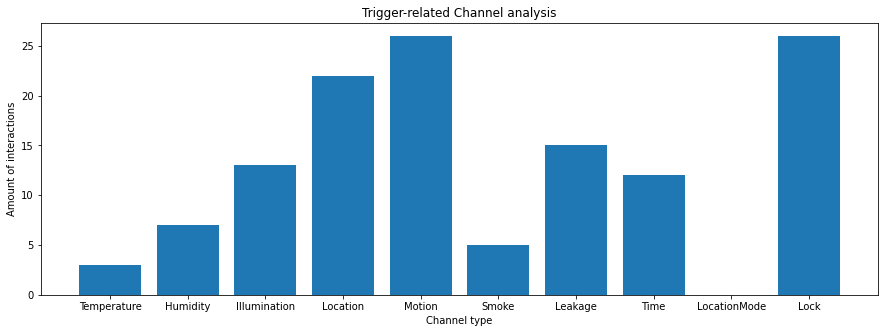

In [27]:
import matplotlib.pyplot as plt

x = ["Temperature","Humidity", "Illumination", "Location", "Motion", "Smoke", "Leakage", "Time", "LocationMode", "Lock"]
x_pos = np.arange(len(x))
plt.figure(figsize=[15, 5])
plt.bar(x_pos, trigger_related, align='center')
plt.xticks(x_pos, x)
plt.ylabel('Amount of interactions')
plt.xlabel('Channel type')
plt.title('Trigger-related Channel analysis')
plt.show()

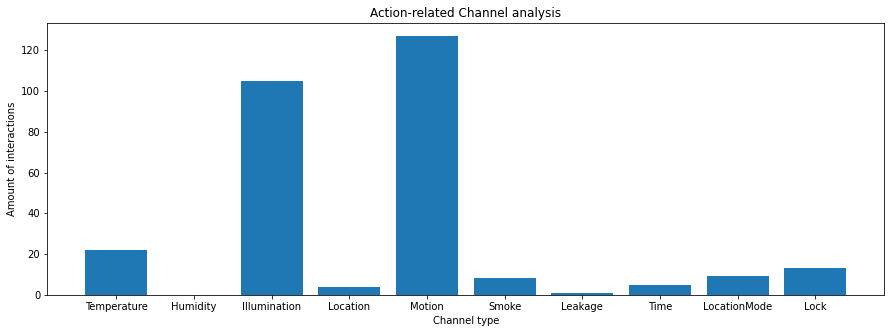

In [28]:
x_pos = np.arange(len(x))
plt.figure(figsize=[15, 5])
plt.bar(x_pos, action_related, align='center')
plt.xticks(x_pos, x)
plt.ylabel('Amount of interactions')
plt.xlabel('Channel type')
plt.title('Action-related Channel analysis')
plt.show()